In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3 as sql

In [12]:
### Define the path to the file (a string in a variable 'db_file')
# if the data directory label is at the same level as the notebook,
# then the path is 'data/astronomers_import.db'
db_file_address = '../../Base_donnees/cycle_manifestation.db'

In [13]:
### This ist the query that produces the data to be analysed.
# It has to be adapted to each use case
q1 = """
SELECT dte.nom, dte.date_debut , dte.date_fin, dte.pays 
FROM distribution_temps_evenements dte     
"""

In [14]:
### Create a connection to the SQLite database of your repository
# Beware : if the database does not exist at the specified address (db_file_address)
# it will be created and will be empty. Therefore, carefully check the database address
try:
    cn = sql.connect(db_file_address)    
except Exception as e:
    # if the connection does not work
    # an error message is raised
    print(e)    


In [15]:
### This instruction executes the query 
# then closes the connection to the database 
q1_df= pd.read_sql_query(q1, cn)
cn.close()
# Inspect the first lines
q1_df.head()

,nom,date_debut,date_fin,pays
0,manifestation des ouvrier-ère-s de Lip,1973-05-18,1973-05-18,Suisse
1,meeting en solidarité aux ouvrier-ère-s de Lip,1973-05-25,1973-05-25,Suisse
2,manifestation des ouvrier-ère-s de Lip,1973-05-18,1973-05-18,France
3,manifestation des ouvrier-ère-s de Lip,1973-05-18,1973-05-18,France
4,regroupement devant le consulat suisse des ouv...,1973-05-18,1973-05-18,France


In [16]:
### Regrouper par date et pays, compter
g_q1 = q1_df[['date_debut', 'pays']].groupby(by=['date_debut', 'pays']).size().to_frame('effectif').reset_index()

g_q1.head()


,date_debut,pays,effectif
0,1973-05-10,France,1
1,1973-05-18,France,3
2,1973-05-18,Suisse,1
3,1973-05-24,France,1
4,1973-05-25,Suisse,1


In [19]:
### Use a different plotting library: Plotly Express
# Observe the default behaviour of the library

fig = px.bar(g_q1, x='date_debut', y='effectif', color='pays',
             color_discrete_sequence=px.colors.qualitative.D3)

#fig = px.bar(x=q1_df.index, y=q1_df.values, title="Manifestations", barmode='relative')
fig.update_yaxes(dtick=1)
fig.update_layout(
    autosize=False,
    width=1000,
    height=400,
)
# fig.show()

## Visualisation avec des points (ou bulles) par pays, type et date

Ces visualisations visent à mettre mieux en évidence la chronologie des événements

In [34]:
fig = px.scatter(
    g_q1, 
    x='date_debut', 
    y='pays', 
    size='effectif', 
    size_max=15, 
    color='pays', 
    hover_data=['date_debut', 'effectif'],
    color_discrete_map={
        'Suisse': 'rgba(255, 80, 80, 0.9)',  # Rouge plus vif pour la Suisse
        'France': 'rgba(80, 150, 255, 0.9)'   # Bleu plus vif pour la France
    }    
)

fig.update_layout(
    autosize=False,
    width=1200,
    height=250,
    xaxis_title="Date", 
    yaxis_title="Pays"
)

# Enregistrer le graphique en tant qu'image statique
fig.write_image("pictures/evenements_par_pays_et_date3.jpg")


In [18]:
### Use a different plotting library: Plotly Express


#size = [s*0.5 for s in g_q1.effectif]

fig = px.scatter(g_q1, x='date_debut', y='pays', size='effectif', size_max=15, color='pays', hover_data=['date_debut', 'effectif'],
             color_discrete_sequence=px.colors.qualitative.D3)

#fig = px.bar(x=q1_df.index, y=q1_df.values, title="Manifestations", barmode='relative')
#fig.update_yaxes(dtick=1)

fig.update_layout(
    autosize=False,
    width=1200,
    height=250,
    xaxis_title="Date", yaxis_title="Pays"
)
fig.write_image("pictures/evenements_par_pays_et_date2.jpg")
fig.show()

### Ajouter au pays un classement des événements

In [29]:
### This ist the query that produces the data to be analysed.
# It has to be adapted to each use case
q2 = """
SELECT e.pk_evenement, e.nom, e."type" type_even, 
CASE
	when e."type" like 'manif%'	
	then 'manif'
	when e."type" = 'meeting'
	then 'meeting'
	else 'autre'
END as class,
e.date as date_debut, e.date as date_fin, l.pays 
FROM evenement e 
JOIN lieu l 
ON e.fk_lieu_debut = l.pk_lieu;  
"""

In [30]:
###Connection to the SQLite database of your repository
try:
    cn = sql.connect(db_file_address)    
except Exception as e:
    # if the connection does not work
    # an error message is raised
    print(e)    

### This instruction executes the query 
# then closes the connection to the database 
q2_df= pd.read_sql_query(q2, cn)
cn.close()
# Inspect the first lines
print(q2_df.head())

   pk_evenement                                                nom  \
0             1             manifestation des ouvrier-ère-s de Lip   
1             2     meeting en solidarité aux ouvrier-ère-s de Lip   
2             3             manifestation des ouvrier-ère-s de Lip   
3             4             manifestation des ouvrier-ère-s de Lip   
4             5  regroupement devant le consulat suisse des ouv...   

                type_even    class  date_debut    date_fin    pays  
0    manifestation de rue    manif  1973-05-18  1973-05-18  Suisse  
1                 meeting  meeting  1973-05-25  1973-05-25  Suisse  
2    manifestation de rue    manif  1973-05-18  1973-05-18  France  
3    manifestation de rue    manif  1973-05-18  1973-05-18  France  
4  manifestation statique    manif  1973-05-18  1973-05-18  France  


In [31]:
### Regrouper par date et pays, compter
g_q2 = q2_df[['date_debut', 'pays', 'class']].groupby(by=['date_debut', 'pays', 'class']).size().to_frame('effectif').reset_index()

g_q2['p_c'] = g_q2.apply( lambda x : x['pays'] +'_'+ x['class'], axis=1)

g_q2.head()


,date_debut,pays,class,effectif,p_c
0,1973-05-10,France,manif,1,France_manif
1,1973-05-18,France,manif,3,France_manif
2,1973-05-18,Suisse,manif,1,Suisse_manif
3,1973-05-24,France,manif,1,France_manif
4,1973-05-25,Suisse,meeting,1,Suisse_meeting


In [32]:
### Use a different plotting library: Plotly Express
# Observe the default behaviour of the library


fig = px.scatter(g_q2.sort_values(by='p_c'), x='date_debut', y=['p_c'], size='effectif', size_max=15, color='class', hover_data=['date_debut', 'effectif'],
             color_discrete_sequence=px.colors.qualitative.D3)


fig.update_layout(
    autosize=False,
    width=1500,
    height=300,
    xaxis_title="Date", yaxis_title="Pays / Type",
    font=dict(
        size=14,  # Set the font size here
        color="Black"
    )
)

xtk = g_q2.date_debut.to_list()

fig.update_xaxes(tickangle=-75,
                 tickmode = 'array',
                 tickvals = xtk,
                 ticktext= xtk,
    tickfont=dict(
                       size=9,  # Set the font size here
        color="DarkBlue"
    ))

fig.update_yaxes(categoryorder='array', categoryarray= ['France_manif', 'France_meeting', 'France_autre','Suisse_manif','Suisse_meeting', 'Suisse_autre'])
fig.write_image("pictures/evenements_par_pays_type_et_date.jpg")

## A reprendre dès qu'il y a les classements

In [14]:

# Charger les données CSV
df = pd.read_csv('../analyse_distribution_moyen_action.csv')

# Affichage des 5 premières lignes du fichier CSV pour vérifier les données
print(df.head())

   pk_evenement                                  nom_evenement  \
0             1         manifestation des ouvrier.ère.s de Lip   
1             1         manifestation des ouvrier.ère.s de Lip   
2             1         manifestation des ouvrier.ère.s de Lip   
3             2  meeting en solidarité aux travailleurs de Lip   
4             2  meeting en solidarité aux travailleurs de Lip   

                   type        date    pays  pk_moyen_action  \
0  manifestation de rue  1973-05-18  Suisse                1   
1  manifestation de rue  1973-05-18  Suisse                2   
2  manifestation de rue  1973-05-18  Suisse                3   
3               meeting  1973-05-25  Suisse                4   
4               meeting  1973-05-25  Suisse                5   

             nom_moyen_action  
0                   banderole  
1                     tracter  
2  port de l'habit de travail  
3                    discours  
4          collage d'affiches  


In [13]:
# Convertir la colonne 'date' en format datetime (au cas où elle ne l'est pas déjà)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df.info())

NameError: name 'df' is not defined

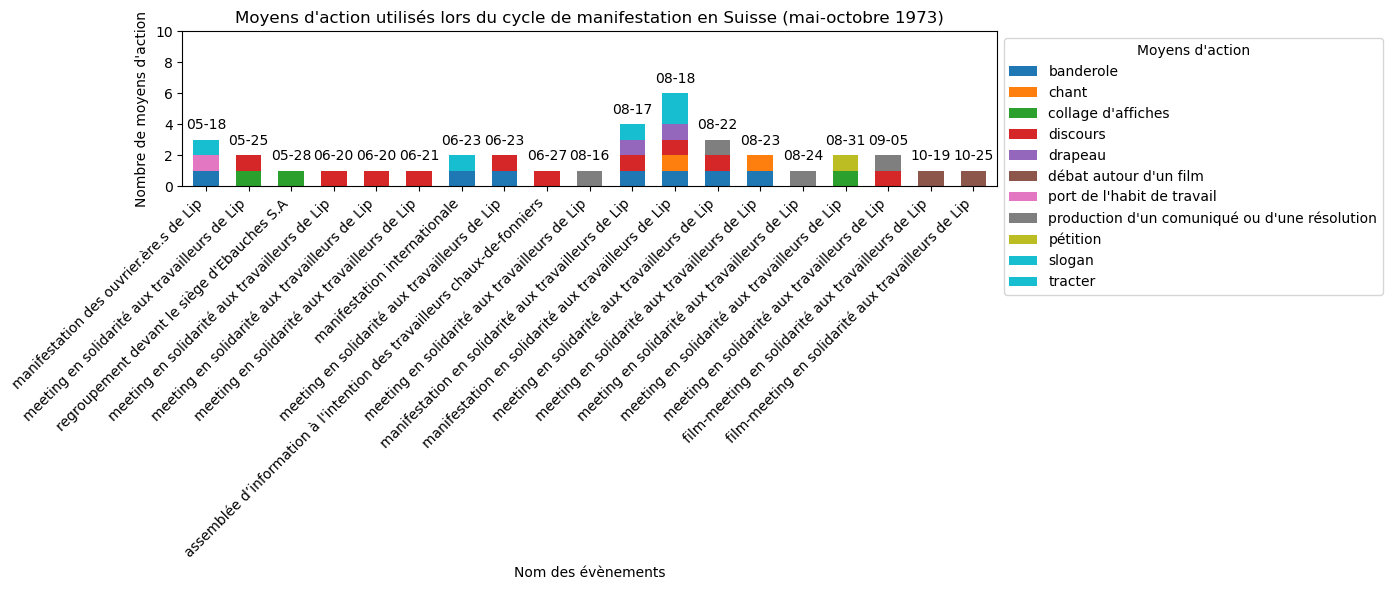

In [4]:
# Filtrer les événements entre mai et juin 1973
df_filtered = df[(df['date'] >= pd.to_datetime('1973-05-01')) & (df['date'] <= pd.to_datetime('1973-11-30'))]

# Trier les événements par date (assurer l'ordre chronologique)
df_sorted = df_filtered.sort_values(by='date')

# Créer une nouvelle colonne avec seulement le mois et le jour (format MM-DD)
df_sorted['mois_jour'] = df_sorted['date'].dt.strftime('%m-%d')  # Format "MM-DD" (ex: 05-18)

# Créer un tableau pivot avec 'mois_jour' pour l'affichage et les moyens d'action
df_pivot = df_sorted.pivot_table(index=["mois_jour", "pk_evenement", "nom_evenement"], 
                                 columns="nom_moyen_action", 
                                 aggfunc="size", 
                                 fill_value=0)

# Renommer les colonnes ici pour que le nom des moyens d'action soit plus clair
df_pivot.columns.name = "Moyens d'action"

# Assurer un ordre chronologique en utilisant 'mois_jour' pour l'affichage des dates
df_pivot = df_pivot.sort_index(level="mois_jour")

# Supprimer 'pk_evenement' de l'affichage final (on garde la structure pour le calcul)
df_pivot = df_pivot.reset_index(level="pk_evenement", drop=True)

# Créer un graphique à barres empilées
fig, ax = plt.subplots(figsize=(14, 6))  # Augmenter la largeur du graphique

# Création du graphique avec un colormap 'tab10' et largeur des barres réduite
df_pivot.plot(kind="bar", stacked=True, ax=ax, width=0.6, colormap="tab10")  # 'tab10' pour des couleurs variées

# Ajouter les labels et le titre
plt.title("Moyens d'action utilisés lors du cycle de manifestation en Suisse (mai-octobre 1973)")
plt.xlabel("Nom des évènements")
plt.ylabel("Nombre de moyens d'action")

# Rotation des labels de l'axe X pour améliorer la lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster l'espacement des marges pour donner de l'espace à la légende
plt.subplots_adjust(bottom=0.25, top=0.85, left=0.1, right=0.75)

# Afficher la date (mois-jour) au-dessus des barres (en utilisant 'mois_jour')
for i, (mois_jour, event) in enumerate(df_pivot.index):
    ax.text(i, df_pivot.iloc[i].sum() + 0.5, str(mois_jour), ha='center', va='bottom', fontsize=10)

# Afficher les noms des événements en dessous des barres (sur l'axe X)
plt.xticks(ticks=range(len(df_pivot.index)), labels=[f"{event}" for _, event in df_pivot.index], rotation=45, ha='right')

# Forcer l'axe Y à avoir un maximum de 5, même si les données sont plus petites
ax.set_ylim(0, 10)

# Placer la légende en haut à droite
plt.legend(title="Moyens d'action", bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=10)

# Sauvegarder l'image en format PNG
plt.savefig('graphique_moyens_actions.png', format='png', bbox_inches='tight', dpi=300)

# Afficher le graphique
plt.tight_layout()
plt.show()

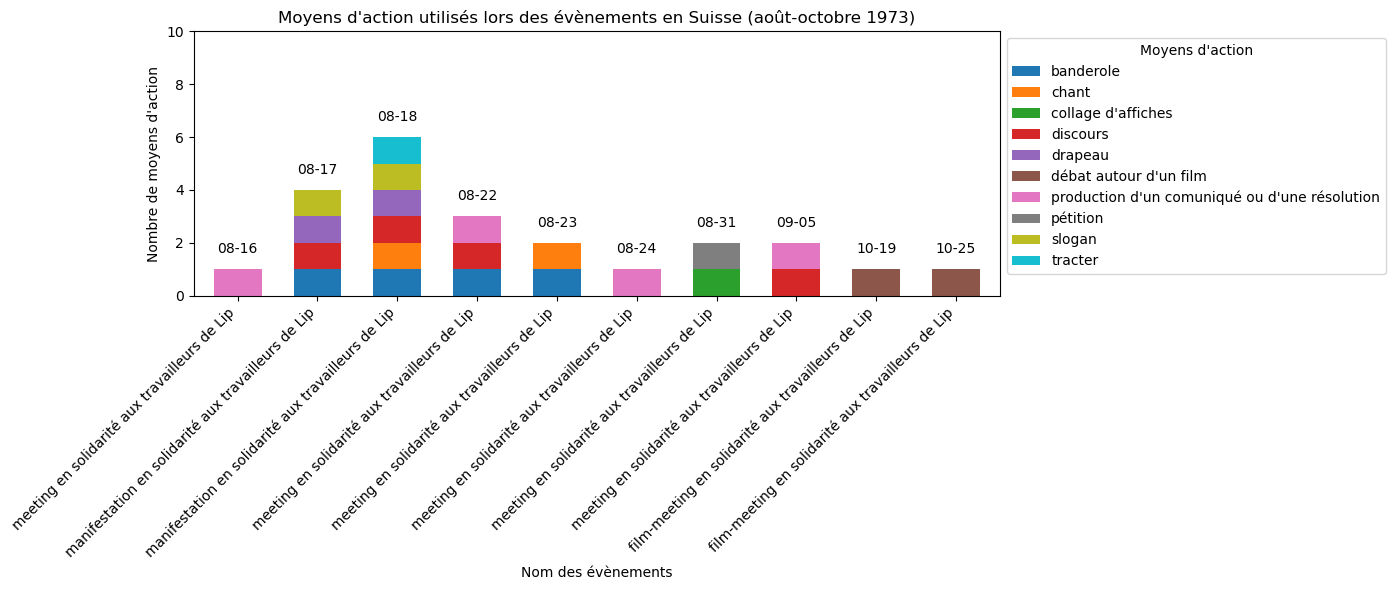

In [5]:


# Filtrer les événements entre mai et juin 1973
df_filtered = df[(df['date'] >= pd.to_datetime('1973-07-01')) & (df['date'] <= pd.to_datetime('1973-11-30'))]

# Trier les événements par date (assurer l'ordre chronologique)
df_sorted = df_filtered.sort_values(by='date')

# Créer une nouvelle colonne avec seulement le mois et le jour (format MM-DD)
df_sorted['mois_jour'] = df_sorted['date'].dt.strftime('%m-%d')  # Format "MM-DD" (ex: 05-18)

# Créer un tableau pivot avec 'mois_jour' pour l'affichage et les moyens d'action
df_pivot = df_sorted.pivot_table(index=["mois_jour", "pk_evenement", "nom_evenement"], 
                                 columns="nom_moyen_action", 
                                 aggfunc="size", 
                                 fill_value=0)

# Renommer les colonnes ici pour que le nom des moyens d'action soit plus clair
df_pivot.columns.name = "Moyens d'action"

# Assurer un ordre chronologique en utilisant 'mois_jour' pour l'affichage des dates
df_pivot = df_pivot.sort_index(level="mois_jour")

# Supprimer 'pk_evenement' de l'affichage final (on garde la structure pour le calcul)
df_pivot = df_pivot.reset_index(level="pk_evenement", drop=True)

# Créer un graphique à barres empilées
fig, ax = plt.subplots(figsize=(14, 6))  # Augmenter la largeur du graphique

# Création du graphique avec un colormap 'tab10' et largeur des barres réduite
df_pivot.plot(kind="bar", stacked=True, ax=ax, width=0.6, colormap="tab10")  # 'tab10' pour des couleurs variées

# Ajouter les labels et le titre
plt.title("Moyens d'action utilisés lors des évènements en Suisse (août-octobre 1973)")
plt.xlabel("Nom des évènements")
plt.ylabel("Nombre de moyens d'action")

# Rotation des labels de l'axe X pour améliorer la lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster l'espacement des marges pour donner de l'espace à la légende
plt.subplots_adjust(bottom=0.25, top=0.85, left=0.1, right=0.75)

# Afficher la date (mois-jour) au-dessus des barres (en utilisant 'mois_jour')
for i, (mois_jour, event) in enumerate(df_pivot.index):
    ax.text(i, df_pivot.iloc[i].sum() + 0.5, str(mois_jour), ha='center', va='bottom', fontsize=10)

# Afficher les noms des événements en dessous des barres (sur l'axe X)
plt.xticks(ticks=range(len(df_pivot.index)), labels=[f"{event}" for _, event in df_pivot.index], rotation=45, ha='right')

# Forcer l'axe Y à avoir un maximum de 5, même si les données sont plus petites
ax.set_ylim(0, 10)

# Placer la légende en haut à droite
plt.legend(title="Moyens d'action", bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=10)

# Sauvegarder l'image en format PNG
plt.savefig('moyens_actions_aout_oct.png', format='png', bbox_inches='tight', dpi=300)

# Afficher le graphique
plt.tight_layout()
plt.show()


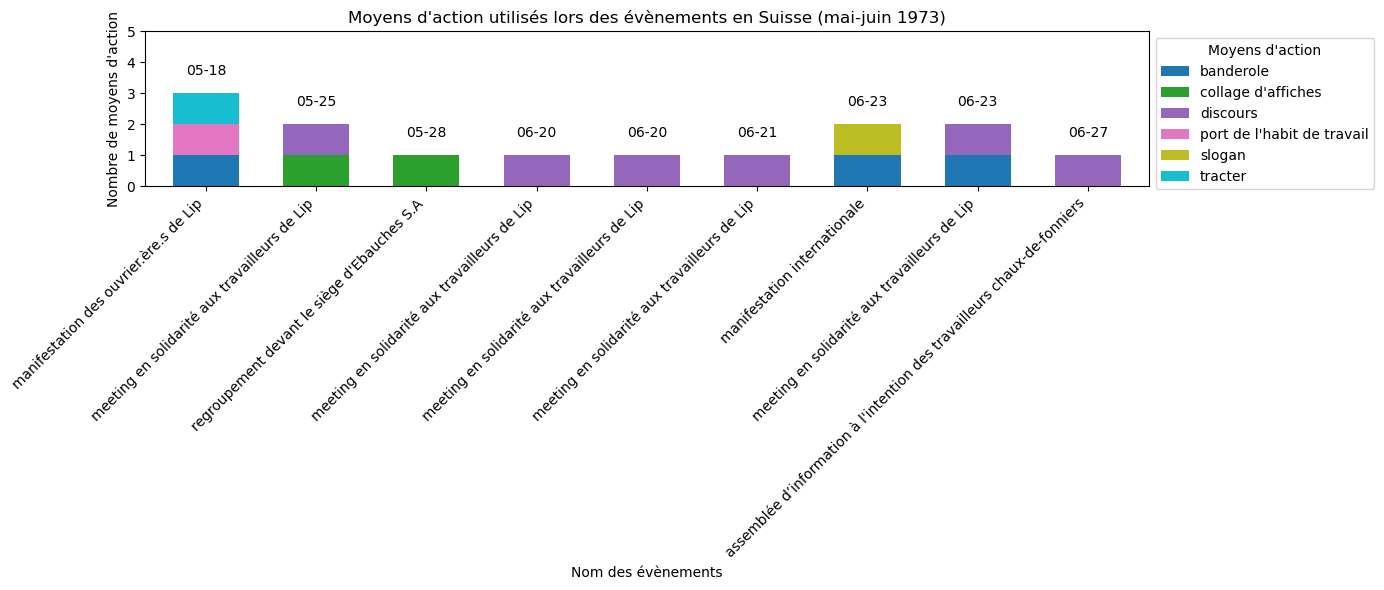

In [6]:



# Filtrer les événements entre mai et juin 1973
df_filtered = df[(df['date'] >= pd.to_datetime('1973-05-01')) & (df['date'] <= pd.to_datetime('1973-06-30'))]

# Trier les événements par date (important pour garder l'ordre chronologique)
df_sorted = df_filtered.sort_values(by='date')

# Créer une nouvelle colonne avec seulement le jour et le mois pour l'affichage
df_sorted['jour_mois'] = df_sorted['date'].dt.strftime('%m-%d') 

# Créer un tableau pivot avec 'pk_evenement' pour une identification unique, 'jour_mois', et 'nom_evenement'
df_pivot = df_sorted.pivot_table(index=["jour_mois", "pk_evenement", "nom_evenement"], 
                                 columns="nom_moyen_action", 
                                 aggfunc="size", 
                                 fill_value=0)

# Renommer les colonnes pour que le nom des moyens d'action soit plus clair
df_pivot.columns.name = "Moyens d'action"

# Assurer un ordre chronologique en utilisant 'date' sur l'axe des X (tri effectué sur 'date', mais on affiche 'jour_mois')
df_pivot = df_pivot.sort_index(level="jour_mois")

# Supprimer 'pk_evenement' de l'affichage final (on garde la structure pour le calcul)
df_pivot = df_pivot.reset_index(level="pk_evenement", drop=True)

# Créer un graphique à barres empilées
fig, ax = plt.subplots(figsize=(14, 6))  # Augmenter la largeur du graphique

# Création du graphique avec un colormap 'tab10' et largeur des barres réduite
df_pivot.plot(kind="bar", stacked=True, ax=ax, width=0.6, colormap="tab10")  # 'tab10' pour des couleurs variées

# Ajouter les labels et le titre
plt.title("Moyens d'action utilisés lors des évènements en Suisse (mai-juin 1973)")
plt.xlabel("Nom des évènements")
plt.ylabel("Nombre de moyens d'action")

# Rotation des labels de l'axe X pour améliorer la lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster l'espacement des marges pour donner de l'espace à la légende
plt.subplots_adjust(bottom=0.25, top=0.85, left=0.1, right=0.75)

# Afficher la date (jour-mois) au-dessus des barres (en utilisant 'jour_mois')
for i, (jour_mois, event) in enumerate(df_pivot.index):
    ax.text(i, df_pivot.iloc[i].sum() + 0.5, str(jour_mois), ha='center', va='bottom', fontsize=10)

# Afficher les noms des événements en dessous des barres (sur l'axe X)
plt.xticks(ticks=range(len(df_pivot.index)), labels=[f"{event}" for _, event in df_pivot.index], rotation=45, ha='right')

# Forcer l'axe Y à avoir un maximum de 5, même si les données sont plus petites
ax.set_ylim(0, 5)

# Placer la légende en haut à droite
plt.legend(title="Moyens d'action", bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=10)
# Sauvegarder l'image en format PNG
plt.savefig('moyens_actions_mai_juin.png', format='png', bbox_inches='tight', dpi=300)

# Afficher le graphique
plt.tight_layout()
plt.show()

